<a href="https://colab.research.google.com/github/tmohammad78/deep-learning-projects/blob/feature%2FautoencoderCNN/deep_auto_encoder_cnn/autoEncoderCnn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [149]:
import sys
import tensorflow as tf
from tensorflow import keras
import matplotlib.pyplot as plt
import numpy as np

In [193]:
def setNoise(array):
  noise_factor = 0.4
  noisy_array = array + noise_factor * np.random.normal(
      loc=0.0, scale=1.0, size=array.shape
  )
  return np.clip(noisy_array, 0.0, 1.0)

def preprocess(array):
  array = array.astype("float32") / 255.0
  array = np.reshape(array, (len(array), 28, 28, 1))
  return array

def display(array1, array2):

  n = 10

  indices = np.random.randint(len(array1), size=n)
  images1 = array1[indices, :]
  images2 = array2[indices, :]

  plt.figure(figsize=(20, 4))
  for i, (image1, image2) in enumerate(zip(images1, images2)):
      ax = plt.subplot(2, n, i + 1)
      plt.imshow(image1.reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

      ax = plt.subplot(2, n, i + 1 + n)
      plt.imshow(image2.reshape(28, 28))
      plt.gray()
      ax.get_xaxis().set_visible(False)
      ax.get_yaxis().set_visible(False)

  plt.show()

In [194]:
(x_train , y_train) , (x_test,y_test) = tf.keras.datasets.mnist.load_data()
x_train =preprocess(x_train)
x_test = preprocess(x_test)
x_train_noise = setNoise(x_train)
x_test_noise = setNoise(x_test)

In [198]:
def encoder(inputs):
 conv_1 = tf.keras.layers.Conv2D(filters=64 , kernel_size=(3,3),activation="relu",padding="same")(inputs)
 max_pooling_1 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_1)

 conv_2 = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same")(max_pooling_1)
 max_pooling_2 = tf.keras.layers.MaxPooling2D(pool_size=(2,2))(conv_2)
 
 return max_pooling_2


In [199]:
def bottle_neck(inputs):
  bottle_neck = tf.keras.layers.Conv2D(filters=256,kernel_size=(3,3),activation="relu", padding="same")(inputs)
  encoder_visualization = tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),activation="sigmoid",padding="same")(bottle_neck)
  
  return bottle_neck,encoder_visualization

In [200]:
def decoder(inputs):
  conv_1 = tf.keras.layers.Conv2D(filters=128,kernel_size=(3,3),activation="relu",padding="same")(inputs)
  up_sample_1 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_1)

  conv_2 = tf.keras.layers.Conv2D(filters=64,kernel_size=(3,3), activation="relu",padding="same")(up_sample_1)  
  up_sample_2 = tf.keras.layers.UpSampling2D(size=(2,2))(conv_2)
  
  conv_3 = tf.keras.layers.Conv2D(filters=1,kernel_size=(3,3),activation="sigmoid",padding="same")(up_sample_2)
  
  return conv_3

In [201]:
def convolutional_auto_encoder():
  inputs = tf.keras.layers.Input(shape=(28,28,1))
  encoder_output = encoder(inputs)
  bottleneck_output , encoder_visualization = bottle_neck(encoder_output)
  decoder_output = decoder(bottleneck_output)

  model = tf.keras.Model(inputs=inputs , outputs = decoder_output)
  encoder_model = tf.keras.Model(inputs=inputs , outputs = encoder_visualization)
  
  return model , encoder_model

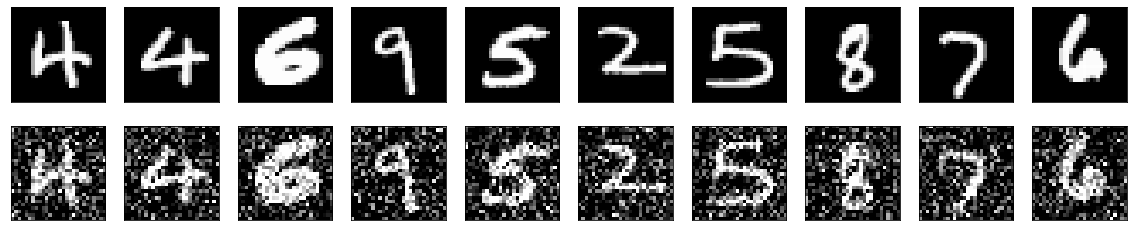

In [202]:
display(x_train, x_train_noise)

In [203]:
model,encoder_model = convolutional_auto_encoder()

In [204]:
model.summary()

Model: "model_16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_9 (InputLayer)         [(None, 28, 28, 1)]       0         
_________________________________________________________________
conv2d_56 (Conv2D)           (None, 28, 28, 64)        640       
_________________________________________________________________
max_pooling2d_16 (MaxPooling (None, 14, 14, 64)        0         
_________________________________________________________________
conv2d_57 (Conv2D)           (None, 14, 14, 128)       73856     
_________________________________________________________________
max_pooling2d_17 (MaxPooling (None, 7, 7, 128)         0         
_________________________________________________________________
conv2d_58 (Conv2D)           (None, 7, 7, 256)         295168    
_________________________________________________________________
conv2d_60 (Conv2D)           (None, 7, 7, 128)         295

In [205]:
opt = keras.optimizers.Adam(learning_rate=0.001,decay = 1e-6)
model.compile(opt,loss="binary_crossentropy")

In [207]:
model.fit(x_train,x_train,epochs=20,batch_size=128,validation_data=(x_test, x_test))

Epoch 1/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0740 - val_loss: 0.0682
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0678 - val_loss: 0.0662
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0662 - val_loss: 0.0652
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0653 - val_loss: 0.0644
Epoch 5/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0646 - val_loss: 0.0640
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0641 - val_loss: 0.0636
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0637 - val_loss: 0.0630
Epoch 8/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0633 - val_loss: 0.0627
Epoch 9/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0630 - val_loss: 0.0626
Epoch 10/20
469/469 [==============================] - 8s 18ms/step - loss: 0.0628 - val_lo

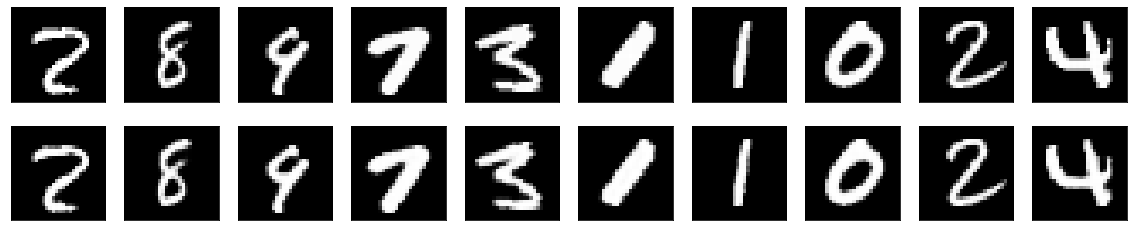

In [162]:
prediction = model.predict(x_test)
display(x_test, prediction)

In [163]:
model.fit(x_train_noise,x_train,epochs=20,batch_size=128,validation_data=(x_test_noise, x_test))

Epoch 1/20
469/469 [==============================] - 8s 17ms/step - loss: 0.1293 - val_loss: 0.0914
Epoch 2/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0905 - val_loss: 0.0886
Epoch 3/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0887 - val_loss: 0.0874
Epoch 4/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0875 - val_loss: 0.0865
Epoch 5/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0868 - val_loss: 0.0860
Epoch 6/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0862 - val_loss: 0.0860
Epoch 7/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0857 - val_loss: 0.0851
Epoch 8/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0852 - val_loss: 0.0848
Epoch 9/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0848 - val_loss: 0.0846
Epoch 10/20
469/469 [==============================] - 8s 17ms/step - loss: 0.0845 - val_lo

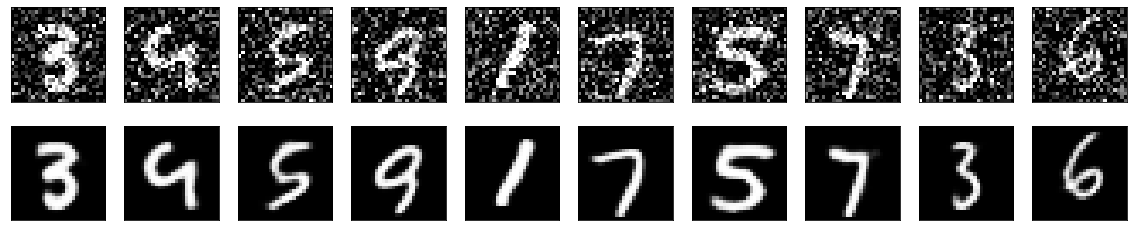

In [164]:
prediction_noise = model.predict(x_test_noise)
display(x_test_noise, prediction_noise)